In [1]:
import pandas as pd


In [2]:
google_data = pd.read_csv('stock_price_prediction.csv')

In [3]:
google_data.shape


(1258, 14)

In [4]:
google_data.describe()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
google_data.isna().sum()


symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

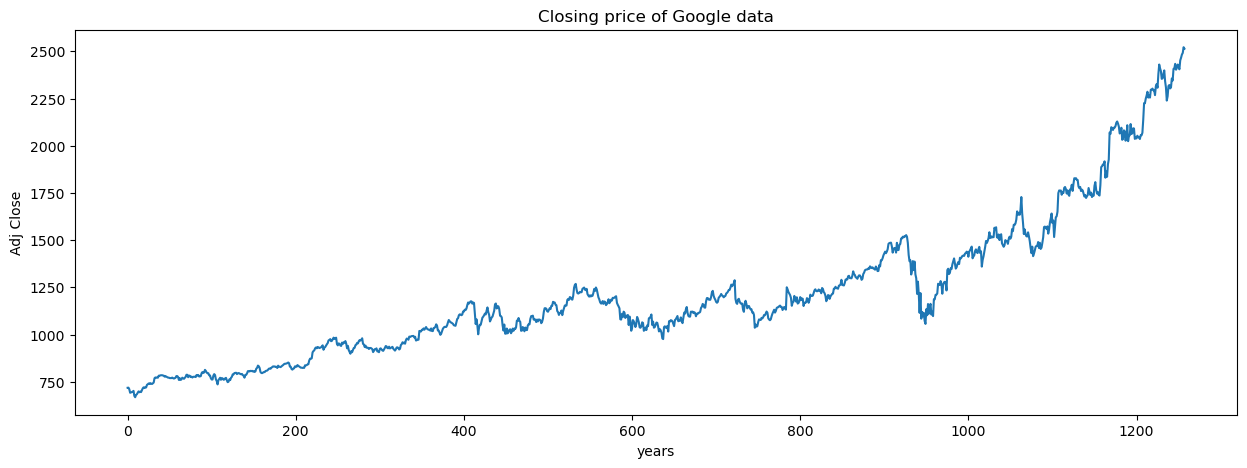

In [9]:
plt.figure(figsize = (15,5))
google_data['adjClose'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [11]:
google_data.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

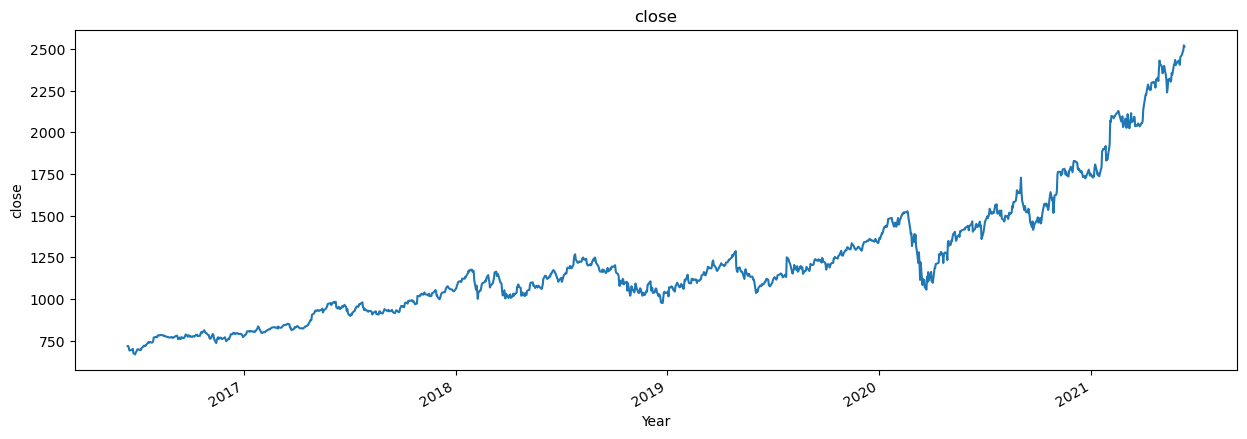

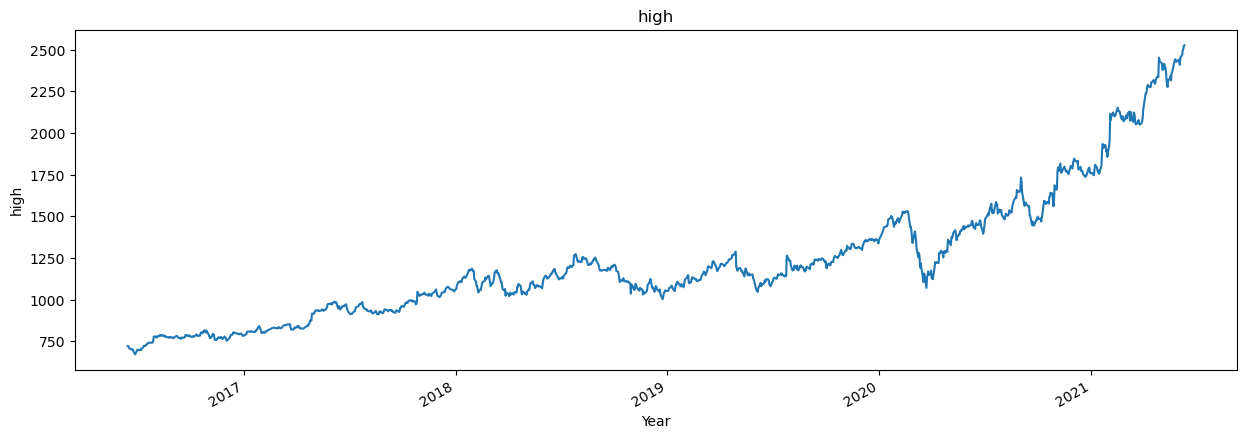

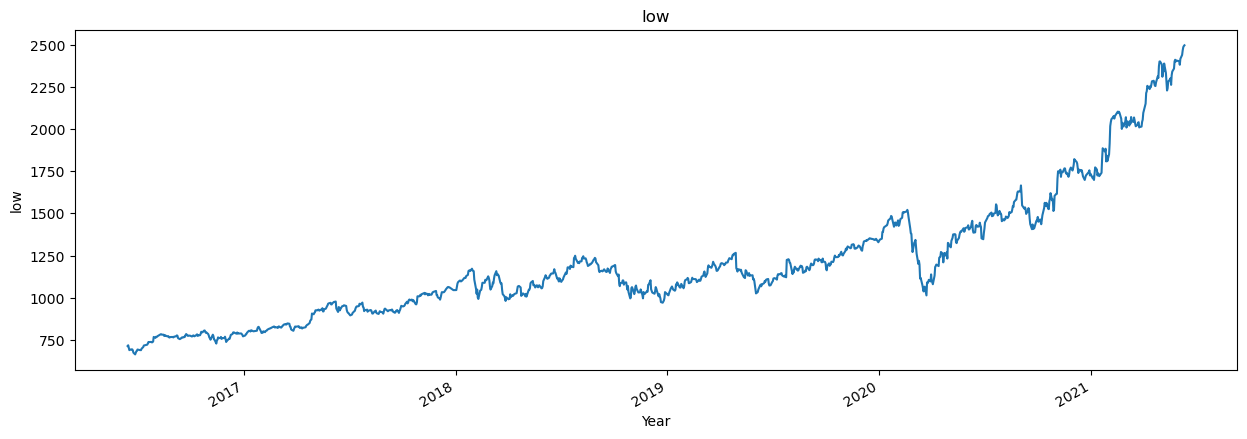

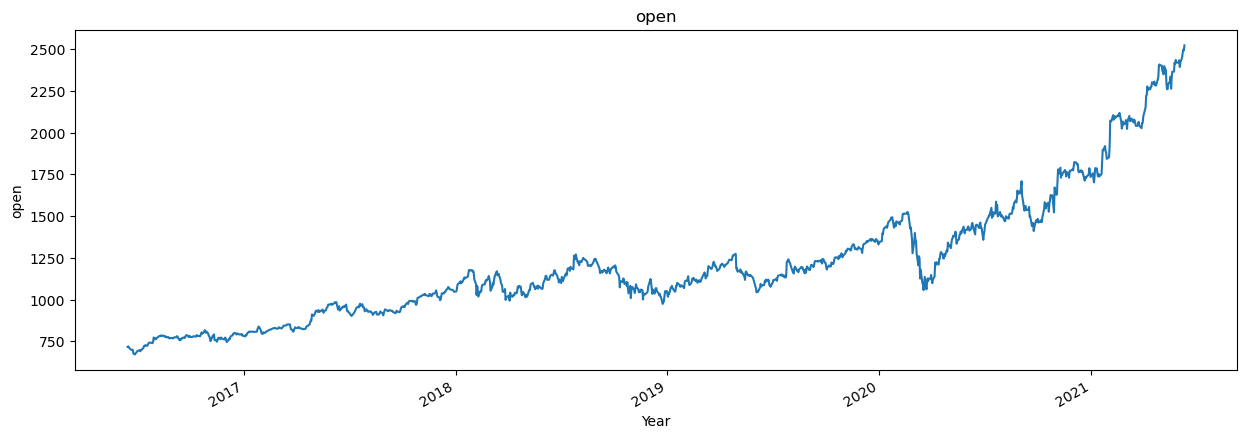

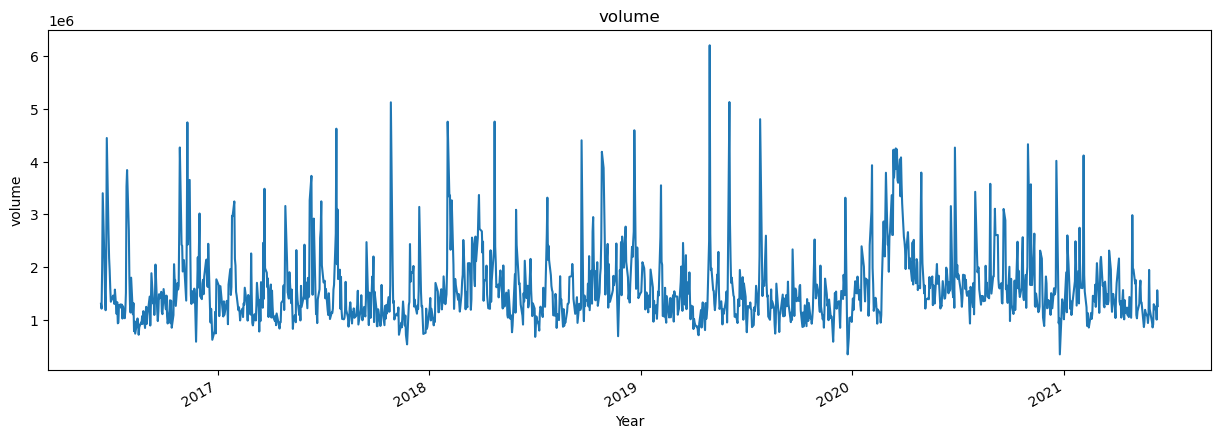

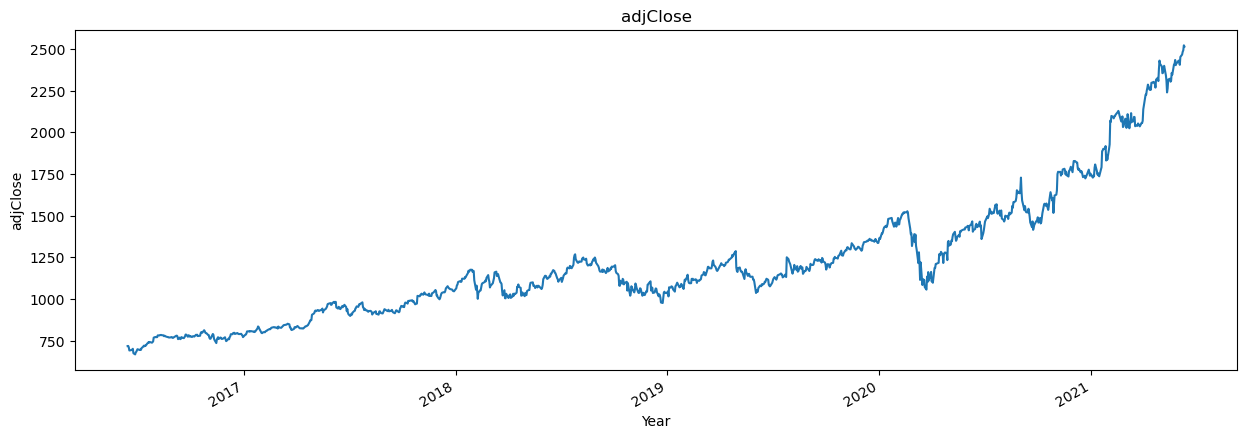

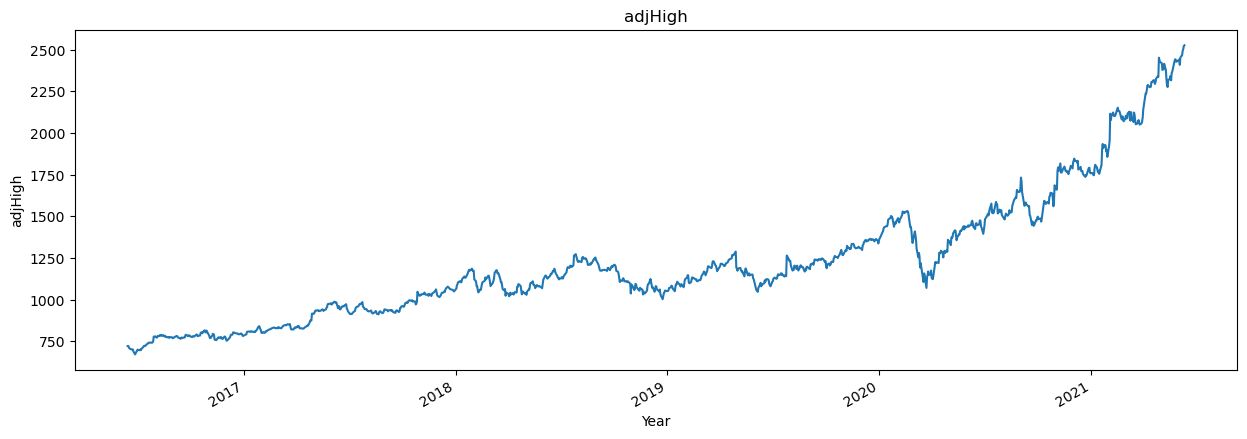

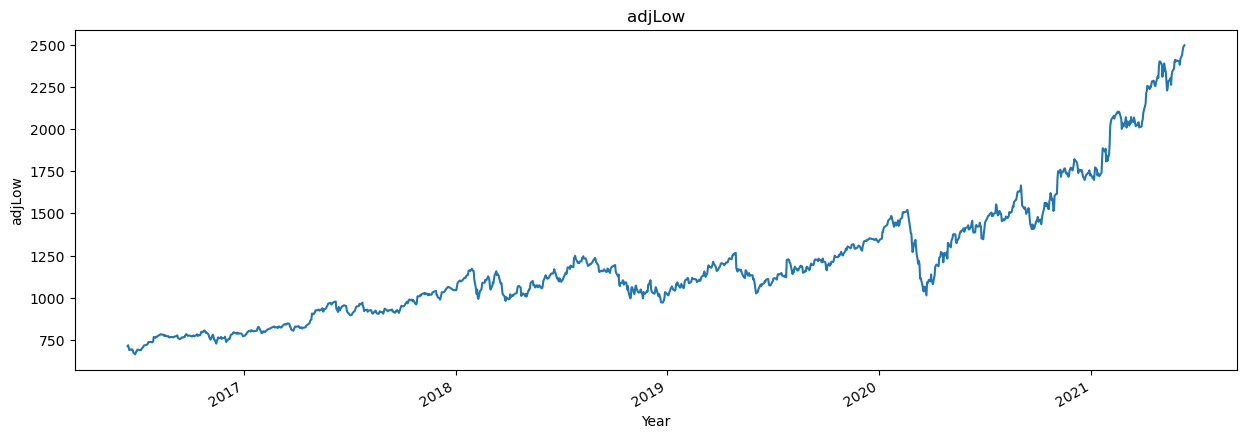

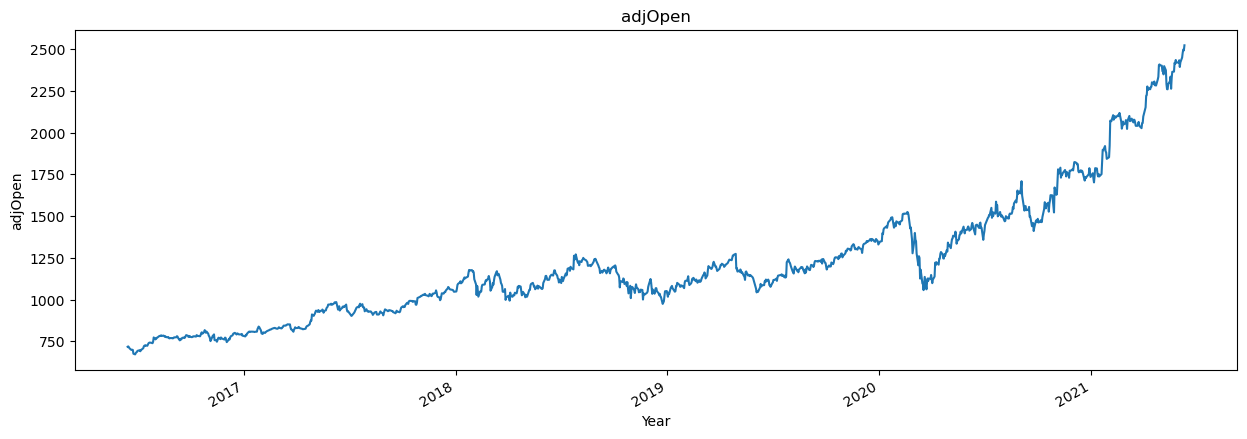

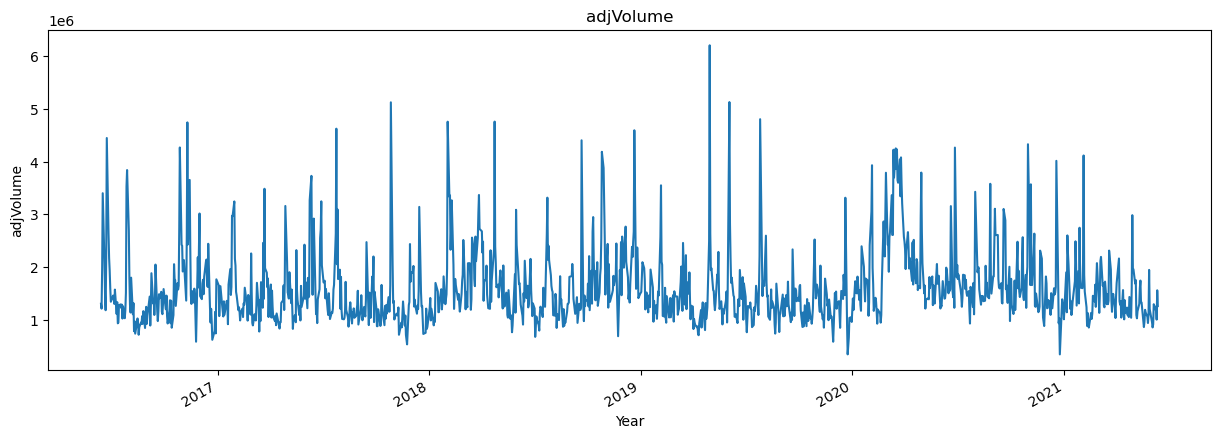

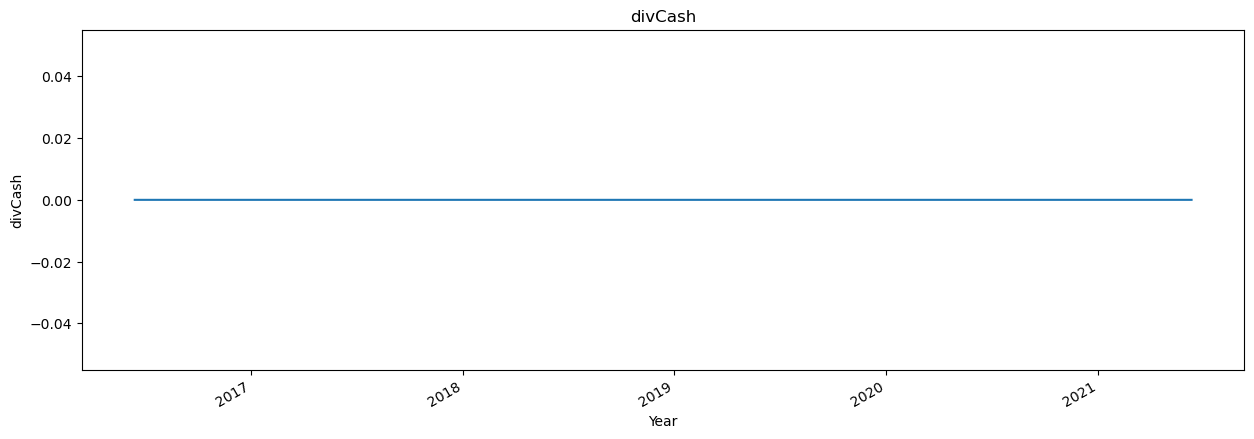

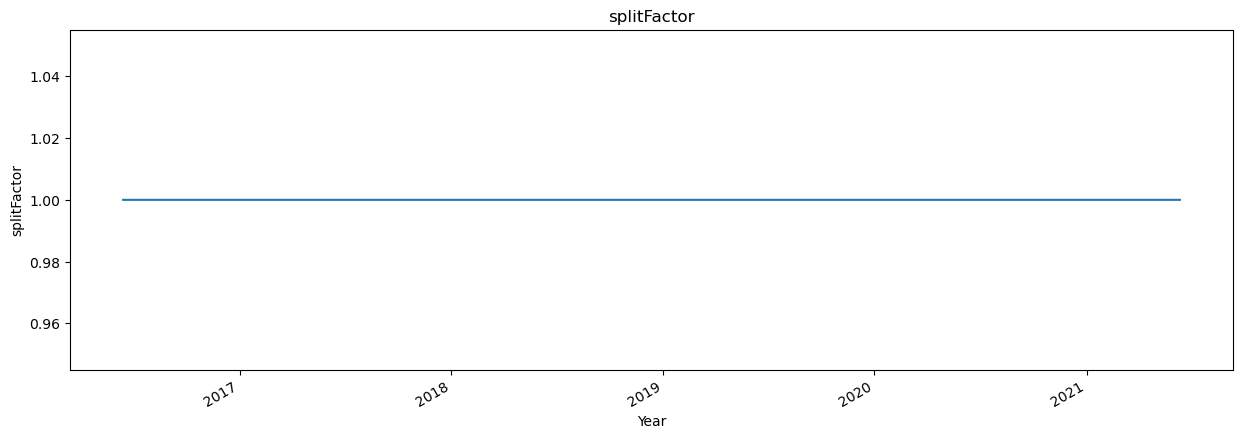

In [14]:
google_data['date'] = pd.to_datetime(google_data['date'])

# Set the date column as the index
google_data.set_index('date', inplace=True)

def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("Year")
    plt.ylabel(column_name)
    plt.title(column_name)
    plt.show()

# Plot graphs for numeric columns
for column in google_data.columns:
    if google_data[column].dtype in ['float64', 'int64']:
        plot_graph((15, 5), google_data[column], column)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2016,2022):
    print(i,list(google_data.index.year).count(i))

2016 140
2017 251
2018 251
2019 252
2020 253
2021 111


In [20]:
google_data['MA_for_250_days'] = google_data['adjClose'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()


date
2017-06-05 00:00:00+00:00          NaN
2017-06-06 00:00:00+00:00          NaN
2017-06-07 00:00:00+00:00          NaN
2017-06-08 00:00:00+00:00          NaN
2017-06-09 00:00:00+00:00    804.38444
Name: MA_for_250_days, dtype: float64

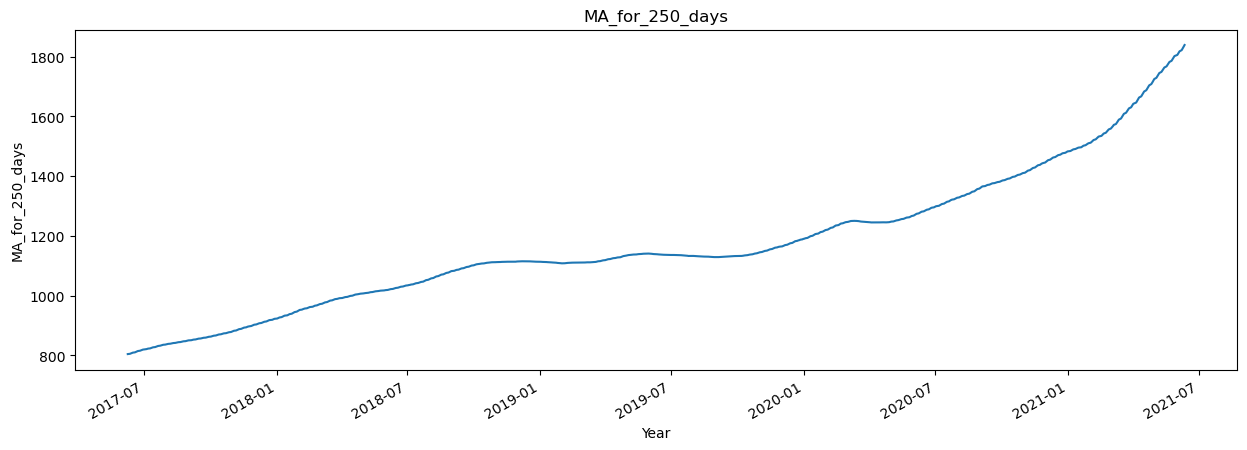

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

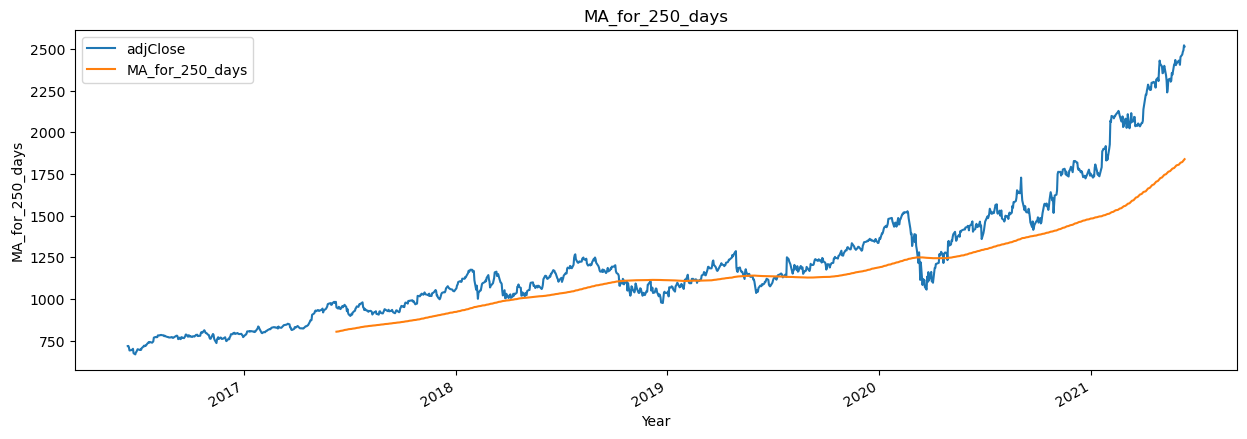

In [24]:
plot_graph((15,5), google_data[['adjClose','MA_for_250_days']], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

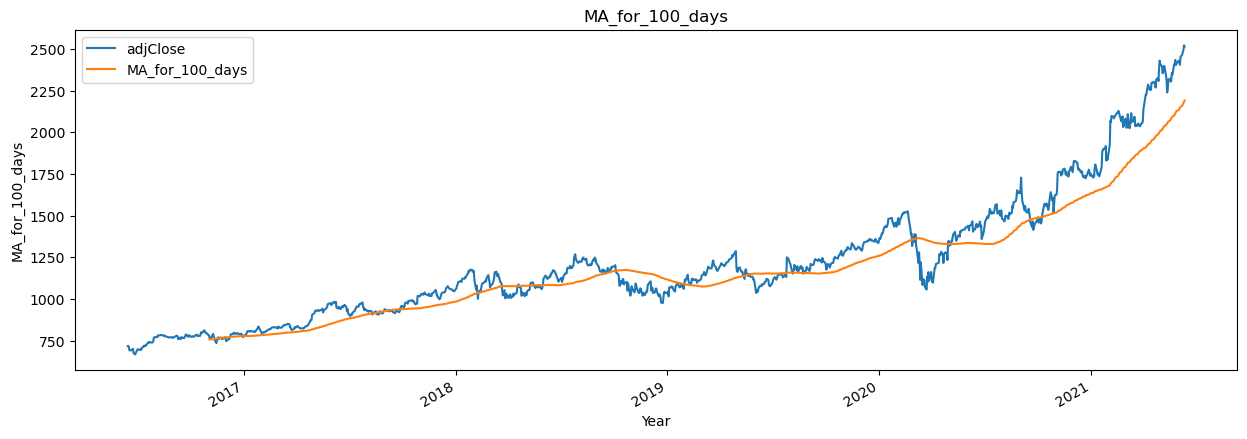

In [25]:
google_data['MA_for_100_days'] = google_data['adjClose'].rolling(100).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

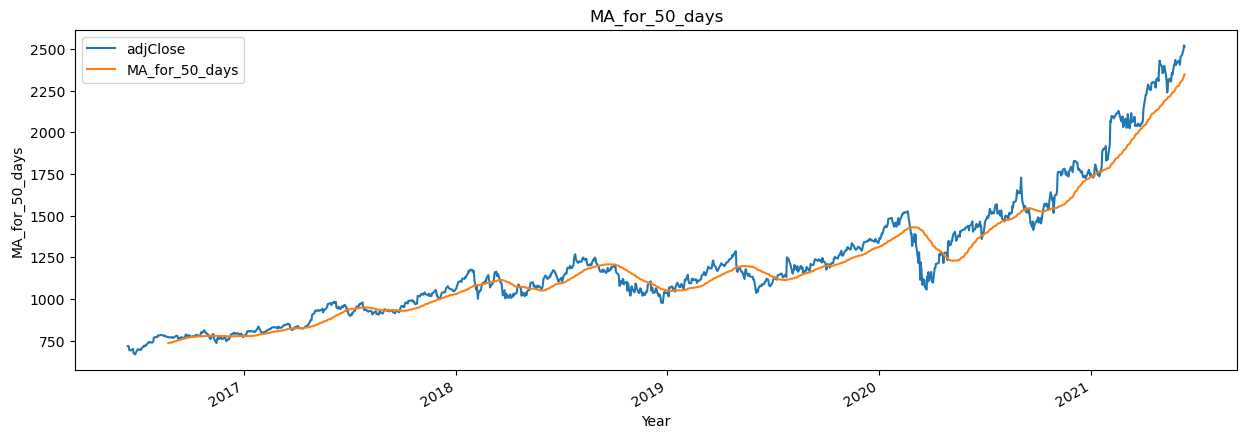

In [26]:
google_data['MA_for_50_days'] = google_data['adjClose'].rolling(50).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_50_days']], 'MA_for_50_days')

<Figure size 640x480 with 0 Axes>

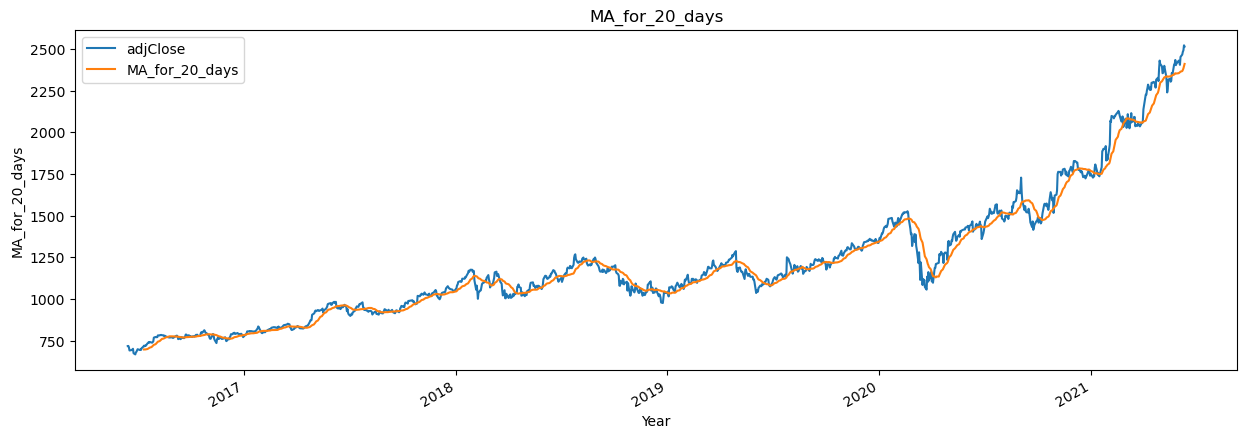

In [27]:
google_data['MA_for_20_days'] = google_data['adjClose'].rolling(20).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_20_days']], 'MA_for_20_days')

<Figure size 640x480 with 0 Axes>

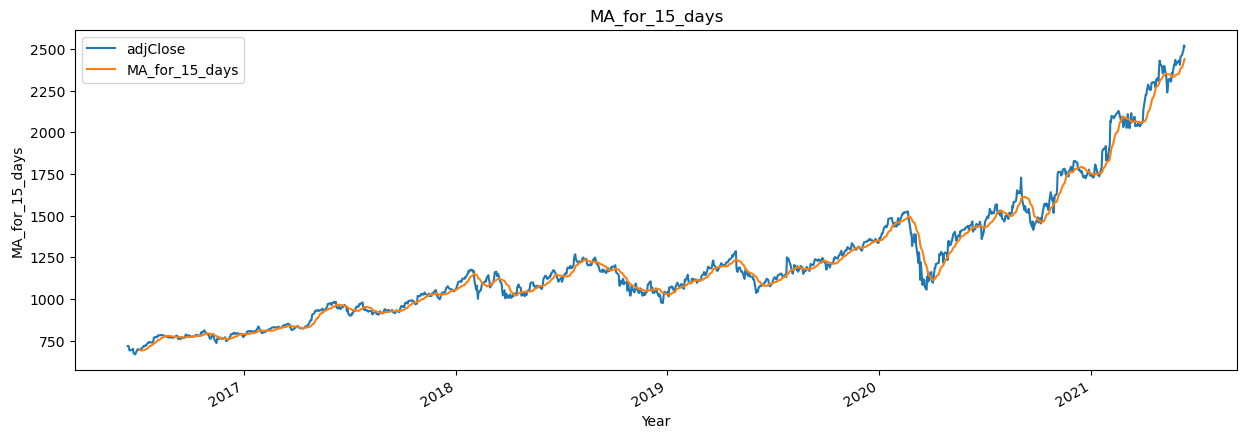

In [28]:
google_data['MA_for_15_days'] = google_data['adjClose'].rolling(15).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_15_days']], 'MA_for_15_days')

<Figure size 640x480 with 0 Axes>

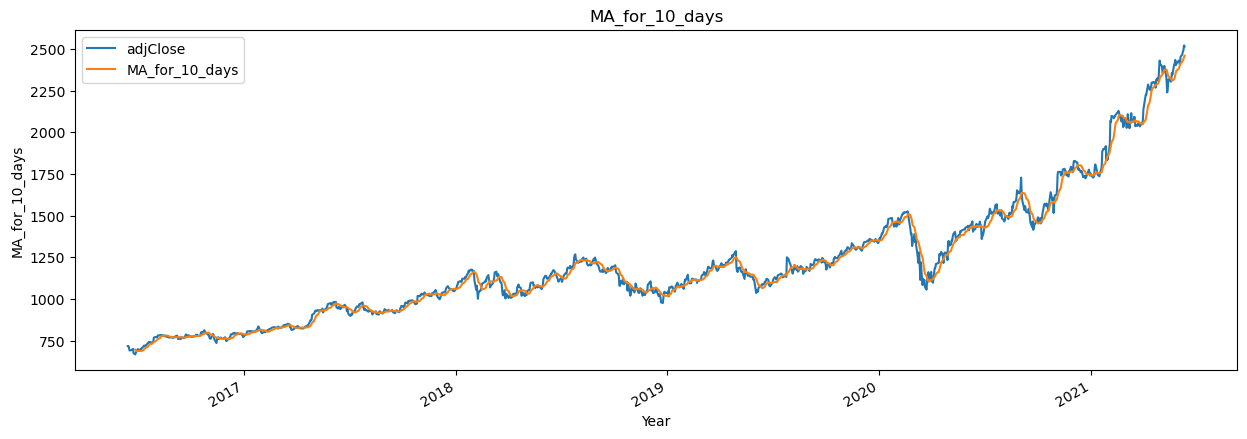

In [29]:
google_data['MA_for_10_days'] = google_data['adjClose'].rolling(10).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_10_days']], 'MA_for_10_days')

<Figure size 640x480 with 0 Axes>

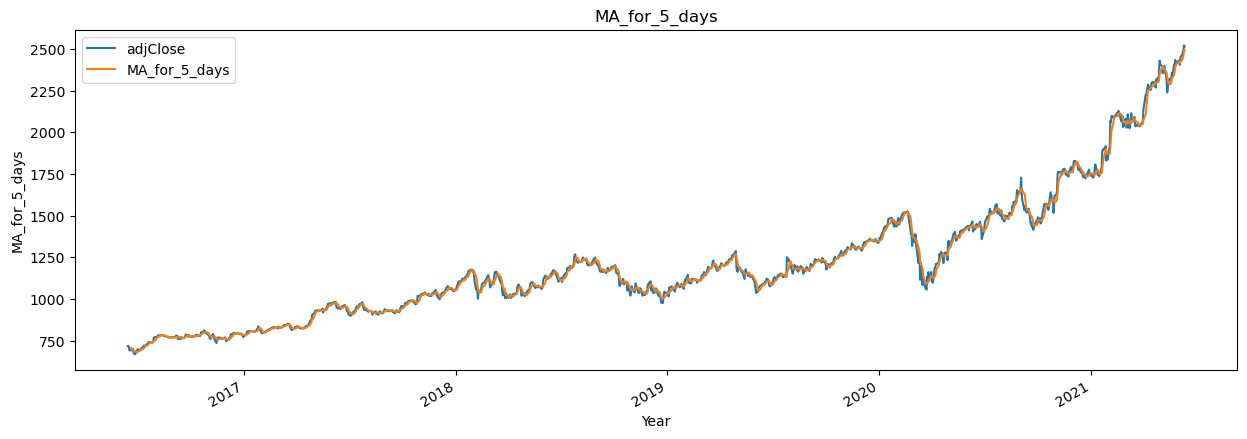

In [30]:
google_data['MA_for_5_days'] = google_data['adjClose'].rolling(5).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_5_days']], 'MA_for_5_days')

<Figure size 640x480 with 0 Axes>

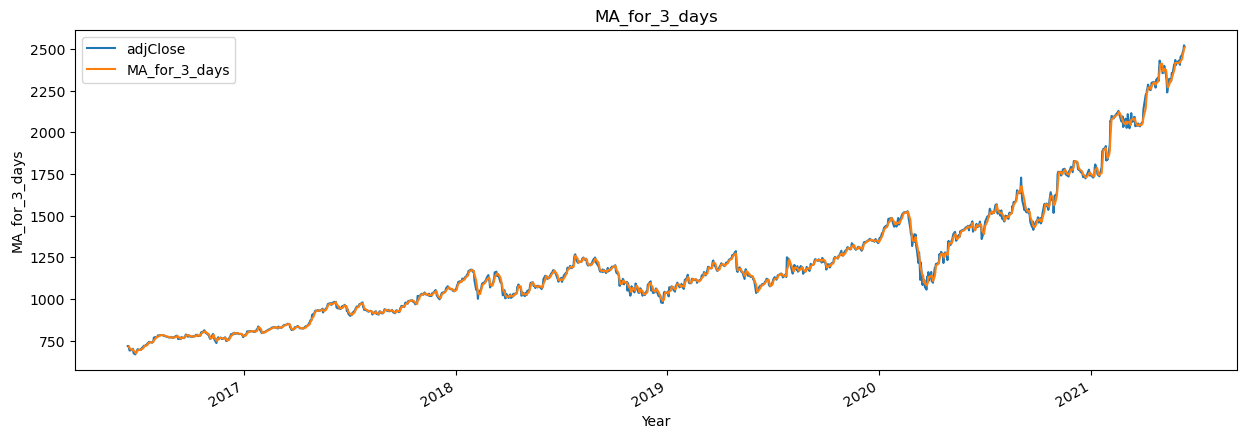

In [31]:
google_data['MA_for_3_days'] = google_data['adjClose'].rolling(3).mean()
plot_graph((15,5), google_data[['adjClose','MA_for_3_days']], 'MA_for_3_days')

<Figure size 640x480 with 0 Axes>

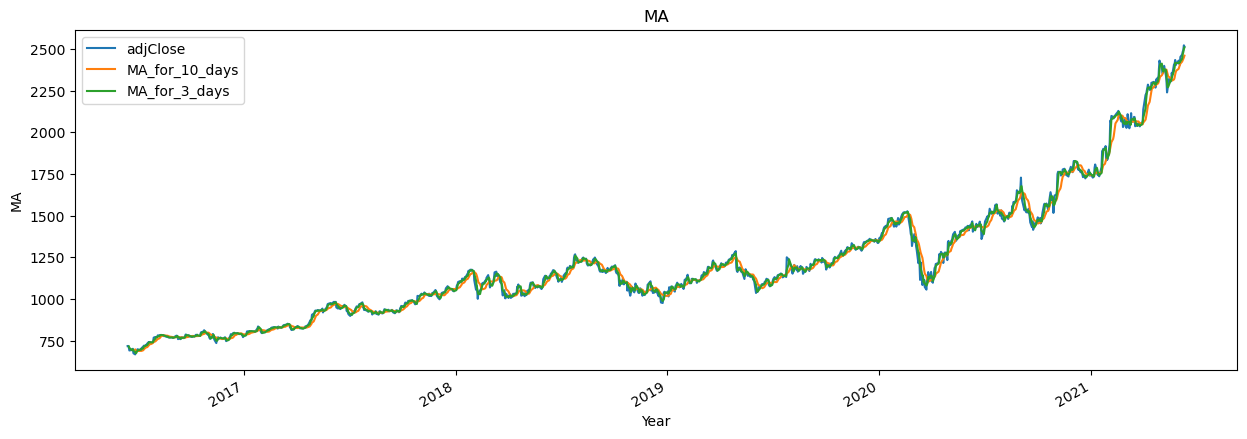

In [32]:
plot_graph((15,5), google_data[['adjClose','MA_for_10_days', 'MA_for_3_days']], 'MA')

In [33]:
google_data['percentage_change_cp'] = google_data['adjClose'].pct_change()
google_data[['adjClose','percentage_change_cp']].head()

,adjClose,percentage_change_cp
date,,
2016-06-14 00:00:00+00:00,718.27,NaN
2016-06-15 00:00:00+00:00,718.92,0.000905
2016-06-16 00:00:00+00:00,710.36,-0.011907
2016-06-17 00:00:00+00:00,691.72,-0.026240
2016-06-20 00:00:00+00:00,693.71,0.002877


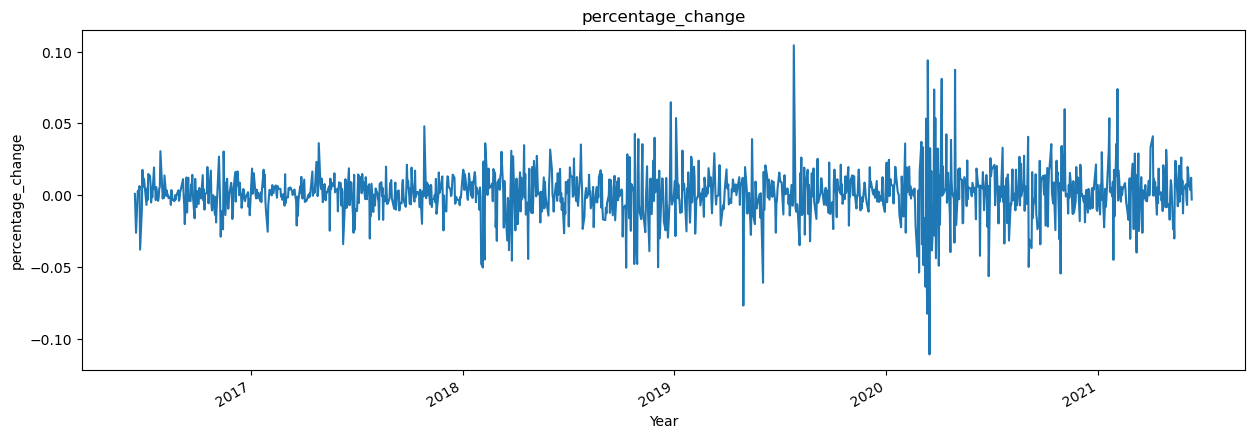

In [34]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [35]:
Adj_close_price = google_data[['adjClose']]


In [36]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([2521.6]), array([668.26]))

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [38]:
len(scaled_data)


1258

In [46]:
x_data = []
y_data = []

for i in range(3, len(scaled_data)):
    x_data.append(scaled_data[i-3:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [47]:
x_data[0],y_data[0]


(array([[0.02698372],
        [0.02733443],
        [0.02271575]]),
 array([0.01265823]))

In [48]:
int(len(x_data)*0.7)


878

In [49]:
1258-3-int(len(x_data)*0.7)

377

In [50]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(878, 3, 1)
(878, 1)
(377, 3, 1)
(377, 1)


In [53]:
pip install keras


                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB 640.0 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.1 MB 660.6 kB/s eta 0:00

In [58]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [60]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Vikas Kansotiya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
from sklearn.metrics import mean_absolute_error


In [74]:
model.compile(optimizer='adam', loss='mean_absolute_error')


In [75]:
model.fit(x_train, y_train, batch_size=1, epochs=2)


Epoch 1/2
878/878 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0145
Epoch 2/2
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0149


In [76]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [77]:
predictions = model.predict(x_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [78]:
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

In [79]:
mae = mean_absolute_error(inv_y_test, inv_predictions)
print(f"MAE: {mae}")

MAE: 72.95453947436589


In [80]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [81]:
rmse


91.18521420610043

In [83]:
print(f"Length of inv_y_test: {len(inv_y_test)}")
print(f"Length of inv_predictions: {len(inv_predictions)}")
print(f"Length of index: {len(google_data.index[splitting_len+100:])}")

Length of inv_y_test: 377
Length of inv_predictions: 377
Length of index: 280


In [84]:
plotting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index=google_data.index[-len(inv_y_test):]
)
print(plotting_data.head())

                           original_test_data  predictions
date                                                      
2019-12-12 00:00:00+00:00             1350.27  1317.872925
2019-12-13 00:00:00+00:00             1347.83  1319.987549
2019-12-16 00:00:00+00:00             1361.17  1321.007812
2019-12-17 00:00:00+00:00             1355.12  1326.054565
2019-12-18 00:00:00+00:00             1352.62  1327.665161


<Figure size 640x480 with 0 Axes>

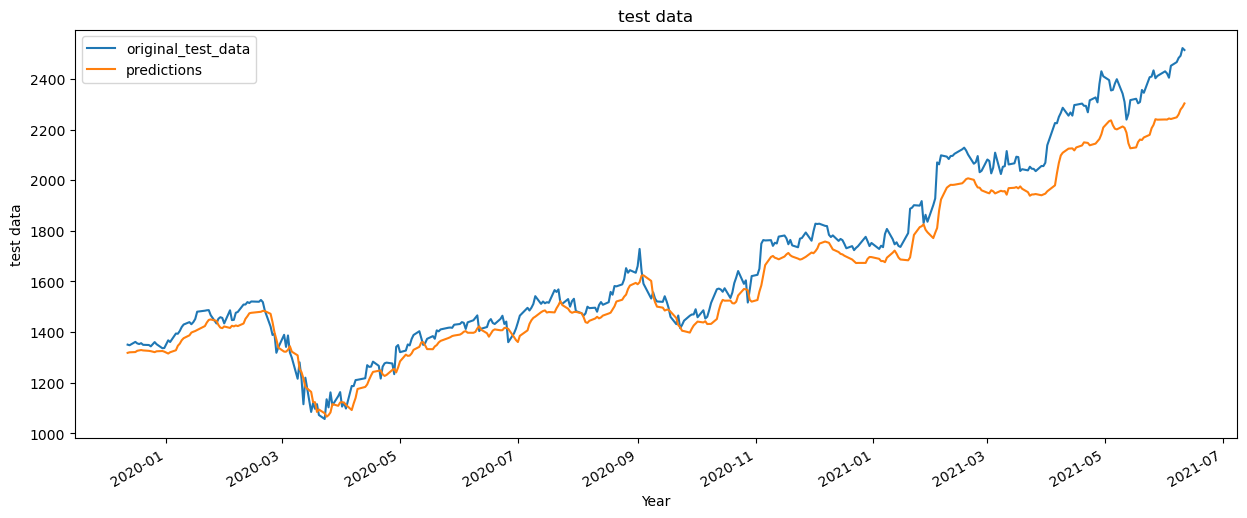

In [85]:
plot_graph((15, 6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

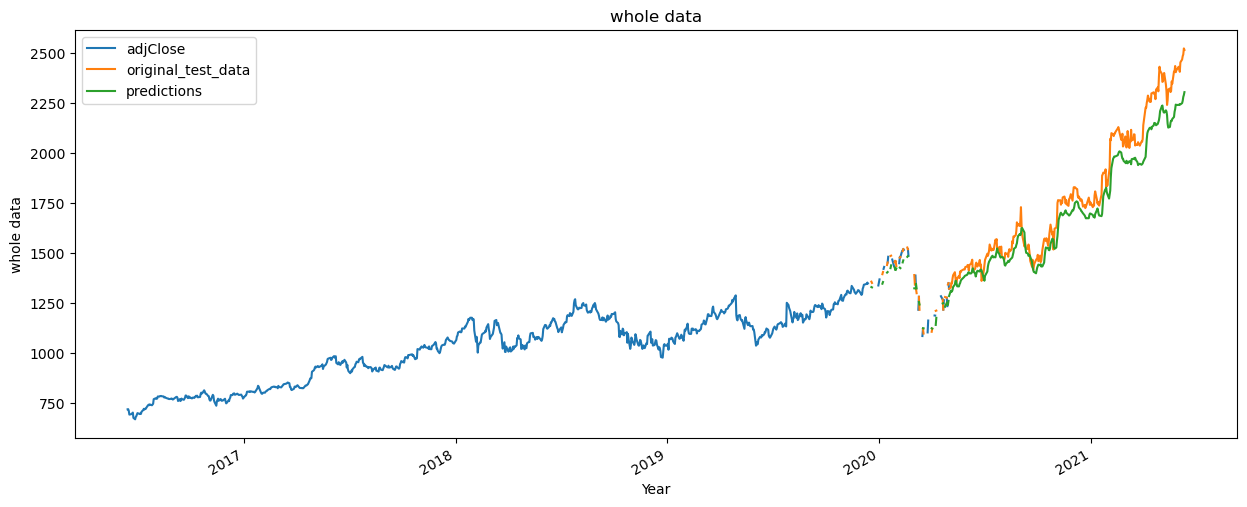

In [86]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')


In [88]:
model.save("Stock_price_prediction_model.keras")